In [1]:
%matplotlib notebook

import json

from collections import defaultdict

import jieba
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.set(style='whitegrid',font=['Microsoft JhengHei'])

In [2]:
# load ptt posts

path = 'sex.json'

with open(path) as f:
    posts = json.load(f)

## Comment Analysis

In [3]:
# get pushes

total_comments = defaultdict(int)
total_pushes = defaultdict(int)
total_hates = defaultdict(int)

for post in posts:
    for comment in post['comments']:
        user = comment['user']
        total_comments[user] += 1

        if comment['score'] > 0:
            total_pushes[user] += 1

        elif comment['score'] < 0:
            total_hates[user] += 1

In [8]:
def show_distributions(counts, pushes, hates):
    sorted_cnts = [t[0] for t in sorted(counts.items(), key=lambda x: -x[1])][:100]
    y = [counts[u] for u in sorted_cnts]
    y_pushes = [pushes[u] for u in sorted_cnts]
    y_hates = [hates[u] for u in sorted_cnts]
    x = range(len(y))
    
    f, ax = plt.subplots(figsize=(10, 6))
    
    sns.set_color_codes('pastel')
    plt.plot(x, y, label='總 {}'.format('評論'), color='blue')
    plt.plot(x, y_pushes, label='總 {}'.format('推文'), color='green')
    plt.plot(x, y_hates, label='總 {}'.format('噓聲'), color='red')

    ax.legend(ncol=2, loc='upper right', frameon=True)
    ax.set(ylabel='數量',
           xlabel='',
           title='性事版總評論數')
    sns.despine(left=True, bottom=True)

    plt.show(f)

In [9]:
print(sns.__version__)

0.10.1


<IPython.core.display.Javascript object>


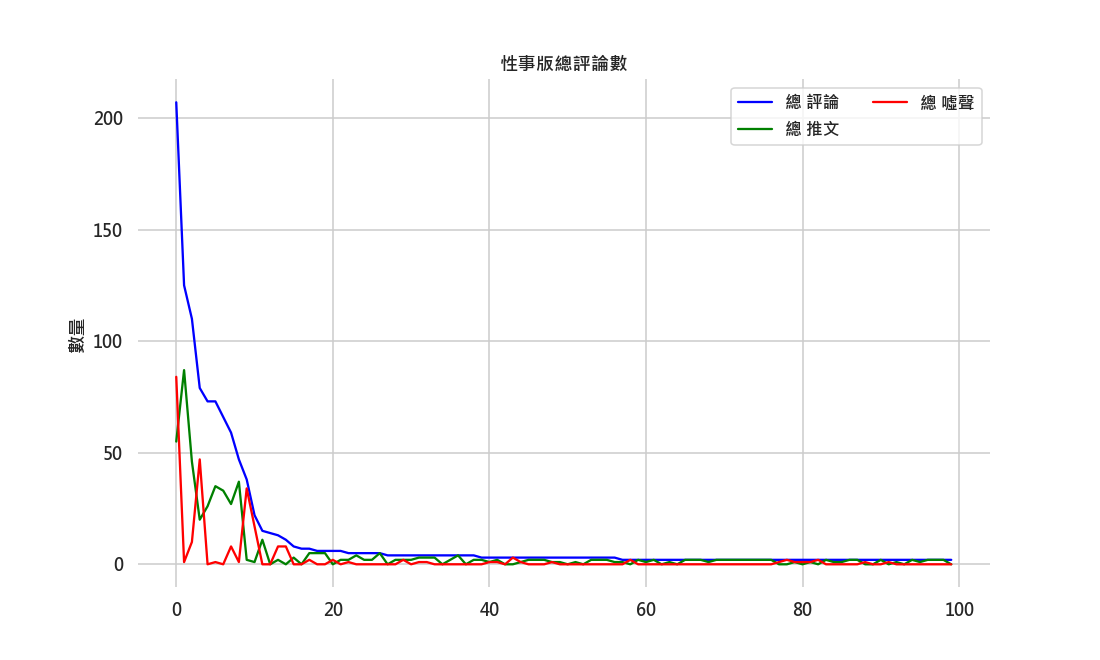

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.


In [10]:
# display pushes
show_distributions(total_comments, total_pushes, total_hates)

In [7]:
import matplotlib
print(matplotlib.__file__)

/home/classuser/.local/lib/python3.6/site-packages/matplotlib/__init__.py
